<a href="https://colab.research.google.com/github/biruk50/Medium_articles/blob/main/genetic_algo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import random
from collections import deque,namedtuple
from google.colab import files  # For file upload in Google Colab
from typing import List, Dict
import matplotlib.pyplot as plt

In [4]:
def genetic_algorithm_knapsack(population, items, capacity, population_size=100, generations=200, mutation_rate=0.1):
    def fitness(individual):
        value, weight = 0, 0
        for i, gene in enumerate(individual):
            if gene:
                value += items[i].value
                weight += items[i].weight
        # Penalize overweight solutions
        if weight > capacity:
            return value - (weight - capacity) * 10  # Penalty proportional to excess weight
        return value

    def crossover(parent1, parent2):
        point = random.randint(1, len(items) - 2)
        return parent1[:point] + parent2[point:]

    def mutate(individual):
        for i in range(len(individual)):
            if random.random() < mutation_rate:
                individual[i] = 1 - individual[i]

    best_fitness_overall = (float('-inf'), [])
    best_fitness_per_generation = []  # List to store best of each generation

    for generation in range(generations):
        population = sorted(population, key=fitness, reverse=True)
        current_best_fitness = fitness(population[0])
        best_fitness_per_generation.append((generation + 1, current_best_fitness))

        # Update the overall best fitness if the current best is greater
        if current_best_fitness > best_fitness_overall[0]:
            best_fitness_overall = (current_best_fitness, population[0])

        next_population = population[:10]  # Elitism: Top 10 carry over

        while len(next_population) < population_size:
            parent1, parent2 = random.choices(population[:50], k=2)  # Select from top 50
            child = crossover(parent1, parent2)
            mutate(child)
            next_population.append(child)

        population = next_population

    return best_fitness_overall, best_fitness_per_generation


def genetic_algorithm_knapsack_alternative(population, items, capacity, population_size=100, generations=200, mutation_rate=0.1):
    def fitness(individual):
        value, weight = 0, 0
        for i, gene in enumerate(individual):
            if gene:
                value += items[i].value
                weight += items[i].weight
        return value

    def fitness_population(population):
        # Partition population into valid and invalid individuals
        valid = [ind for ind in population if sum(items[i].weight for i, gene in enumerate(ind) if gene) <= capacity]
        invalid = [ind for ind in population if ind not in valid]

        valid.sort(key=fitness, reverse=True)

        best_valid_fitness = fitness(valid[0]) if valid else float('-inf')

        # Sort invalid by minimum weight (as long as their fitness exceeds the best_valid_fitness)
        invalid = [ind for ind in invalid if fitness(ind) > best_valid_fitness]
        invalid.sort(key=lambda ind: sum(items[i].weight for i, gene in enumerate(ind) if gene))

        return valid, invalid, best_valid_fitness

    def multiple_crossovers(valid, invalid):
        new_population = []
        for i in range(min(len(valid), len(invalid))):
            point = random.randint(1, len(items) - 2)
            new_population.append(valid[i][:point] + invalid[i][point:])
        return new_population

    def crossover(parent1, parent2):
        point = random.randint(1, len(items) - 2)
        return parent1[:point] + parent2[point:]

    def mutate(individual):
        for i in range(len(individual)):
            if random.random() < mutation_rate:
                individual[i] = 1 - individual[i]

    best_fitness_overall = (float('-inf'), [])
    best_fitness_per_generation = []

    for generation in range(generations):
        valid, invalid, current_best_fitness = fitness_population(population)
        best_fitness_per_generation.append((generation + 1, current_best_fitness))  # Store current best fitness

        if current_best_fitness > best_fitness_overall[0]:
            best_fitness_overall = (current_best_fitness, valid[0])

        # Generate new population from criss-cross
        valid_top = valid[:5]
        invalid_top = invalid[:5]
        next_population = multiple_crossovers(valid_top, invalid_top)
        next_population += valid[0:5]

        # Fill the remaining population with mutated valid individuals
        mix_valid_population = valid[:len(valid) // 2] + invalid[:len(invalid) // 4]
        random.shuffle(mix_valid_population)

        while len(next_population) < len(population):
            parent1, parent2 = random.choices(mix_valid_population, k=2)  # Select from top 50
            child = crossover(parent1, parent2)
            mutate(child)
            next_population.append(child)

        population = next_population

    return best_fitness_overall, best_fitness_per_generation

def genetic_algorithm_knapsack_strict(population, items, capacity, population_size=100, generations=200, mutation_rate=0.1):
    def fitness(individual):
        value, weight = 0, 0
        for i, gene in enumerate(individual):
            if gene:
                value += items[i].value
                weight += items[i].weight
        # Fitness is 0 if weight exceeds capacity
        if weight > capacity:
            return 0
        return value

    def crossover(parent1, parent2):
        point = random.randint(1, len(items) - 2)
        return parent1[:point] + parent2[point:]

    def mutate(individual):
        for i in range(len(individual)):
            if random.random() < mutation_rate:
                individual[i] = 1 - individual[i]

    best_fitness_overall = (float('-inf'), [])
    best_fitness_per_generation = []  # List to store best of each generation

    for generation in range(generations):
        population = sorted(population, key=fitness, reverse=True)
        current_best_fitness = fitness(population[0])
        best_fitness_per_generation.append((generation + 1, current_best_fitness))  # Store current best fitness

        # Update the overall best fitness if the current best is greater
        if current_best_fitness > best_fitness_overall[0]:
            best_fitness_overall = (current_best_fitness, population[0])

        next_population = population[:10]  # Elitism: Top 10 carry over

        while len(next_population) < population_size:
            parent1, parent2 = random.choices(population[:50], k=2)  # Select from top 50
            child = crossover(parent1, parent2)
            mutate(child)
            next_population.append(child)

        population = next_population

    return best_fitness_overall, best_fitness_per_generation

Saving ks_200_1 to ks_200_1
capacity 2640230

Generation-wise Comparison:
Generation | Strict Original Algorithm | Original Algorithm | Alternative Algorithm
         1 |                            0 |          -2480625 |                   -inf
         2 |                            0 |           -740036 |                1061294
         3 |                            0 |           -126471 |                1061294
         4 |                            0 |           1048250 |                1085022
         5 |                            0 |           1085369 |                1085022
         6 |                            0 |           1085369 |                1085022
         7 |                            0 |           1085369 |                1085022
         8 |                            0 |           1085369 |                1085022
         9 |                            0 |           1085961 |                1085022
        10 |                            0 |           10859

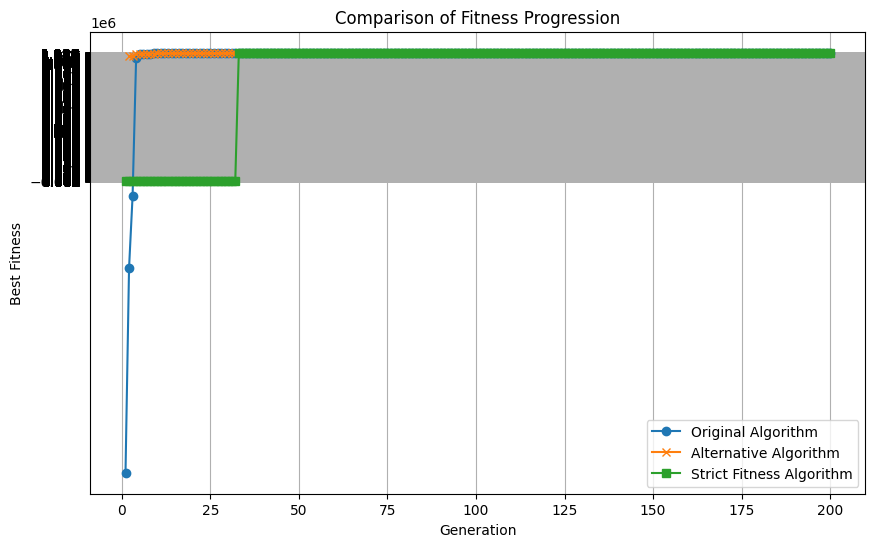

In [9]:
# Define the Item named tuple
Item = namedtuple("Item", ['index', 'value', 'weight', 'cluster_id'])

# Upload and read file
uploaded = files.upload()
file_name = list(uploaded.keys())[0]

with open(file_name, 'r') as file:
    input_data = file.read().strip()

# Parse the input data
lines = input_data.split('\n')
first_line = lines[0].split()
item_count = int(first_line[0])
capacity = int(first_line[1])

print(f"capacity {capacity}")

items = []
for i, line in enumerate(lines[1:], start=1):
    value, weight = map(int, line.split())
    items.append(Item(i, value, weight, -1))

# Prepare data for plotting and clustering
values = [item.value for item in items]
weights = [item.weight for item in items]

# Initialize random population
population = [[random.randint(0, 1) for _ in range(len(items))] for _ in range(100)]

best_overall_3, fitness_per_gen_3 = genetic_algorithm_knapsack_strict(population, items, capacity)
best_overall_1, fitness_per_gen_1 = genetic_algorithm_knapsack(population, items, capacity)
best_overall_2, fitness_per_gen_2 = genetic_algorithm_knapsack_alternative(population, items, capacity)

# Print side-by-side comparison of best fitness per generation
print("\nGeneration-wise Comparison:")
print("Generation | Strict Original Algorithm | Original Algorithm | Alternative Algorithm")
for gen in range(len(fitness_per_gen_1)):
    print(f"{gen + 1:10} | {fitness_per_gen_3[gen][1]:28} |{fitness_per_gen_1[gen][1]:18} | {fitness_per_gen_2[gen][1]:22}")
# Example Usage: Run all three algorithms

# Plot the fitness progression for all three algorithms
plt.figure(figsize=(10, 6))
plt.plot([x[0] for x in fitness_per_gen_1], [x[1] for x in fitness_per_gen_1], label='Original Algorithm', marker='o')
plt.plot([x[0] for x in fitness_per_gen_2], [x[1] for x in fitness_per_gen_2], label='Alternative Algorithm', marker='x')
plt.plot([x[0] for x in fitness_per_gen_3], [x[1] for x in fitness_per_gen_3], label='Strict Fitness Algorithm', marker='s')

plt.xlabel('Generation')
plt.ylabel('Best Fitness')

# Set detailed y-axis ticks
min_fitness = max(0,
min(
    min(x[1] for x in fitness_per_gen_1),
    min(x[1] for x in fitness_per_gen_2),
    min(x[1] for x in fitness_per_gen_3)
))
max_fitness = max(
    0,
    max(x[1] for x in fitness_per_gen_1),
    max(x[1] for x in fitness_per_gen_2),
    max(x[1] for x in fitness_per_gen_3)
)
plt.yticks(range(int(min_fitness) - 100, int(max_fitness) + 100, 100))  # Detailed ticks every 100 units

plt.title('Comparison of Fitness Progression')
plt.legend()
plt.grid(True)  # Enable the grid for better visibility
plt.show()